In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data

data example:
[[ 0.46987038  0.30807248  1.        ]
 [-0.61553529 -0.57628448  0.        ]
 [ 0.62626005  0.50843567  1.        ]
 [-0.60192519 -0.49001183  0.        ]]


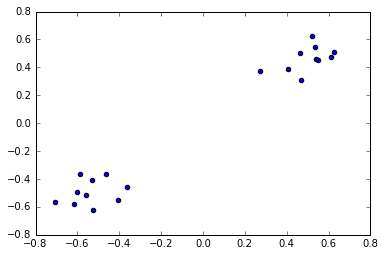

In [5]:
# Lets have some (linearly separated blobs) data to start with 
def get_datapoints(n):
    import numpy as np
    from sklearn.datasets.samples_generator import make_blobs
    X, labels = make_blobs(n_samples=n, centers=[[-0.5, -0.5], [0.5, 0.5]], cluster_std=0.1)
    # add X and labels
    return np.append(X, labels.reshape(len(labels), 1), axis=1)

data = get_datapoints(20)
print "data example:\n", data[:4]
# plot them
_ = plt.scatter(data[:,0], data[:,1])

# The perceptron as class

In [22]:
from pylab import rand,plot,show,norm

class Perceptron:
    
    def __init__(self):
        """ perceptron initialization """
        self.w = rand(2) * 2 - 1 
        # is a learning rate that we must choose 
        self.learning_rate = 0.01
        
    def response(self,x):
        """ perceptron output """
        # dot product between w and x
        y = x[0] * self.w[0] + x[1] * self.w[1] 
        return 1 if y >= 0. else 0

    def train(self, data, n_epochs=100):
        """ 
        trains all the vector in data.
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        for epoch in range(n_epochs):
            
            sum_error = 0.0
            for datapoint in data: 

                expected = datapoint[2]
                predicted = self.response(datapoint)    
                
                # if we have a wrong response
                if expected != predicted: 
                    
                    # update sum error
                    sum_error += abs(expected - predicted)

                    # update weights
                    # w(t+1) = w(t) + learning_rate * (expected - predicted) * x
                    self.w[0] += self.learning_rate * (expected - predicted) * datapoint[0]
                    self.w[1] += self.learning_rate * (expected - predicted) * datapoint[1]

            print "epoch:{0}, sum error: {1}, learned: {2}"\
                    .format(epoch, sum_error, (sum_error == 0))
                
            if sum_error == 0.:
                break



# Train Perceptron

In [29]:
data_train = get_datapoints(100)
perceptron = Perceptron()   
perceptron.train(data_train)  

epoch:0, sum error: 75.0, learned: False
epoch:1, sum error: 12.0, learned: False
epoch:2, sum error: 4.0, learned: False
epoch:3, sum error: 2.0, learned: False
epoch:4, sum error: 2.0, learned: False
epoch:5, sum error: 2.0, learned: False
epoch:6, sum error: 2.0, learned: False
epoch:7, sum error: 2.0, learned: False
epoch:8, sum error: 1.0, learned: False
epoch:9, sum error: 1.0, learned: False
epoch:10, sum error: 0.0, learned: True


# Use (trained) Perceptron for classification

iterations 100
4
error
error


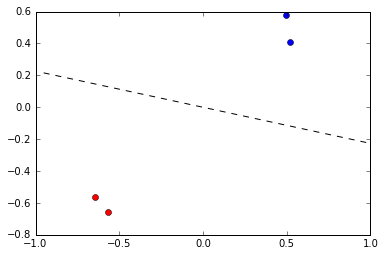

In [70]:
testset = get_datapoints(4)  # test set generation
print len(testset)
# Perceptron test
for x in testset:
    r = perceptron.response(x)
    if r != x[2]: # if the response is not correct
        print 'error'
    if r == 1:
        plot(x[0],x[1],'ob')  
    else:
        plot(x[0],x[1],'or')


# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

In [77]:
import urllib2
import ImageFile

image_url = "http://localhost:8889//Users/charilaostsarouchas/tsarouch_github/daltonic_assistant/blue_image.png"
opener1 = urllib2.build_opener()
page1=opener1.open(image_url)

p = ImageFile.Parser()

while 1:
    s = page1.read(1024)
    if not s:
        break
    p.feed(s)

im = p.close()
r,g,b = im.getpixel((0,0))

fout = open('images/tony'+image[s]+"%d%_d%_d"%(r,g,b), "wb")
fout.write(my_picture)
fout.close()

HTTPError: HTTP Error 404: Not Found